In [ ]:
# 82% test accuracy achieved
# addition of class weights
# pathology and healthy recordings are both from the SVD dataset

In [24]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install glob
!pip install directory_tree
!pip install tensorflow
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob

[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: C:\Users\princ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:
import os
import sklearn
import numpy as np
import pandas as pd
import glob
import librosa 
from directory_tree import display_tree
path = r'C:/Users/princ/OneDrive - University of Strathclyde/Documents/university/fourth year/diss/AT2'


In [26]:
def windows(audio, window_size):
    start = 0
    while start < len(audio):
        #len(audio) is the total number of sample points for an audio file.
        yield start, int(start) + window_size #Retrieve the sample point index index of length window_size
        start += (window_size / 2) #Calculate the starting position of the next segment

In [27]:
# now only two catergories: 0 - healthy, 1 - pathology

path = 'C:/Users/princ/OneDrive - University of Strathclyde/Documents/university/fourth year/diss/AT2'

extracted_features_hel = pd.DataFrame(columns=['features','label','names','classification'])
extracted_features_pat = pd.DataFrame(columns=['features','label','names','classification'])

def extract_features(parent_dir, sub_dirs, label, file_ext="*.wav", bands=60, frames=41):
    '''Wrangle audio data into 60x41x2 frames.'''

    window_size = 512 * (frames - 1)

    log_specgrams = []
    labels = []
    names = []

    search_patterns = [
        os.path.join(parent_dir, sub, "**", file_ext) 
        for sub in sub_dirs
    ]

    for search_pattern in search_patterns:
        for fn in glob.glob(search_pattern, recursive=True):

            sound_clip, s = librosa.load(fn)

            for (start, end) in windows(sound_clip, window_size):
                start = int(start)
                end = int(end)

                if len(sound_clip[start:end]) == window_size:

                    names.append(fn.replace(path, ''))

                    signal = sound_clip[start:end]
                    feature = []

                    D = np.abs(librosa.stft(signal))**2
                    melspec = librosa.feature.melspectrogram(S=D, n_mels=bands)
                    feature.append(librosa.amplitude_to_db(melspec))

                    melspec = librosa.feature.melspectrogram(y=signal, n_mels=bands)
                    feature.append(librosa.amplitude_to_db(melspec))

                    melspec = librosa.feature.mfcc(y=signal, sr=s, n_mfcc=bands)
                    feature.append(librosa.amplitude_to_db(melspec))

                    log_specgrams.append(feature)
                    labels.append(label)

    
    for i in range(len(log_specgrams)):
        log_specgrams[i] = np.array(log_specgrams[i])
        log_specgrams[i] = np.transpose(log_specgrams[i], (1, 2, 0))

    data = {
        'features': log_specgrams,
        'label': labels,
        'names': names
    }

    df = pd.DataFrame(data, columns=['features', 'label', 'names'])
    return df


In [28]:
path = 'C:/Users/princ/OneDrive - University of Strathclyde/Documents/university/fourth year/diss/AT2'

# Healthy -> label 0
extracted_features_hel = extract_features(path, ['Healthy'], 0)
print(f"Healthy features extracted: {len(extracted_features_hel)}")

# Pathology -> label 1
extracted_features_path = extract_features(path, ['Pathology'], 1)
print(f"Pathology features extracted: {len(extracted_features_path)}")

Healthy features extracted: 1344
Pathology features extracted: 24521


In [29]:
## Data should be stored in directory fromat 
display_tree(path,max_depth=4)

AT2/
├── Healthy/
│   ├── 1-a_h.wav
│   ├── 1-a_l.wav
│   ├── 1-a_lhl.wav
│   ├── 1-a_n.wav
│   ├── 1-i_h.wav
│   ├── 1-i_l.wav
│   ├── 1-i_lhl.wav
│   ├── 1-i_n.wav
│   ├── 1-phrase.wav
│   ├── 1-u_h.wav
│   ├── 1-u_l.wav
│   ├── 1-u_lhl.wav
│   ├── 1-u_n.wav
│   ├── 10-a_h.wav
│   ├── 10-a_l.wav
│   ├── 10-a_lhl.wav
│   ├── 10-a_n.wav
│   ├── 10-i_h.wav
│   ├── 10-i_l.wav
│   ├── 10-i_lhl.wav
│   ├── 10-i_n.wav
│   ├── 10-phrase.wav
│   ├── 10-u_h.wav
│   ├── 10-u_l.wav
│   ├── 10-u_lhl.wav
│   ├── 10-u_n.wav
│   ├── 100-a_h.wav
│   ├── 100-a_l.wav
│   ├── 100-a_lhl.wav
│   ├── 100-a_n.wav
│   ├── 100-i_h.wav
│   ├── 100-i_l.wav
│   ├── 100-i_lhl.wav
│   ├── 100-i_n.wav
│   ├── 100-phrase.wav
│   ├── 100-u_h.wav
│   ├── 100-u_l.wav
│   ├── 100-u_lhl.wav
│   ├── 100-u_n.wav
│   ├── 1000-a_h.wav
│   ├── 1000-a_l.wav
│   ├── 1000-a_lhl.wav
│   ├── 1000-a_n.wav
│   ├── 1000-i_h.wav
│   ├── 1000-i_l.wav
│   ├── 1000-i_lhl.wav
│   ├── 1000-i_n.wav
│   ├── 1000-phrase.wav
│   ├── 1000-u_h.w

C:\Users\princ\AppData\Local\Temp\ipykernel_28376\2193101141.py:2: DeprecationWarning: The `display_tree` Function is Deprecated and will be Removed in a Future Release. Please use `DirectoryTree` Instead. End of Life Date is "31st December 2024".
  display_tree(path,max_depth=4)


│   ├── 1108-i_l.wav
│   ├── 1108-i_lhl.wav
│   ├── 1108-i_n.wav
│   ├── 1108-phrase.wav
│   ├── 1108-u_h.wav
│   ├── 1108-u_l.wav
│   ├── 1108-u_lhl.wav
│   ├── 1108-u_n.wav
│   ├── 1109-a_h.wav
│   ├── 1109-a_l.wav
│   ├── 1109-a_lhl.wav
│   ├── 1109-a_n.wav
│   ├── 1109-i_h.wav
│   ├── 1109-i_l.wav
│   ├── 1109-i_lhl.wav
│   ├── 1109-i_n.wav
│   ├── 1109-phrase.wav
│   ├── 1109-u_h.wav
│   ├── 1109-u_l.wav
│   ├── 1109-u_lhl.wav
│   ├── 1109-u_n.wav
│   ├── 1110-a_h.wav
│   ├── 1110-a_l.wav
│   ├── 1110-a_lhl.wav
│   ├── 1110-a_n.wav
│   ├── 1110-i_h.wav
│   ├── 1110-i_l.wav
│   ├── 1110-i_lhl.wav
│   ├── 1110-i_n.wav
│   ├── 1110-phrase.wav
│   ├── 1110-u_h.wav
│   ├── 1110-u_l.wav
│   ├── 1110-u_lhl.wav
│   ├── 1110-u_n.wav
│   ├── 1111-a_h.wav
│   ├── 1111-a_l.wav
│   ├── 1111-a_lhl.wav
│   ├── 1111-a_n.wav
│   ├── 1111-i_h.wav
│   ├── 1111-i_l.wav
│   ├── 1111-i_lhl.wav
│   ├── 1111-i_n.wav
│   ├── 1111-phrase.wav
│   ├── 1111-u_h.wav
│   ├── 1111-u_l.wav
│   ├── 1111-u_lhl.wav


In [30]:
## load all data 

healthy_folders = ['Healthy']
pathology_folders = ['Pathology']

extracted_features_hel = extract_features(path, healthy_folders, 0)
extracted_features_path = extract_features(path, pathology_folders, 1)

extracted_features_hel['classification'] = 'healthy'
extracted_features_path['classification'] = 'pathology'

print(f"Healthy features extracted: {len(extracted_features_hel)}")
print(f"Pathology features extracted: {len(extracted_features_path)}")

Healthy features extracted: 1344
Pathology features extracted: 24521


In [31]:
if len(extracted_features_hel) > len(extracted_features_path):
    size = len(extracted_features_path)
else:
    size = len(extracted_features_hel)

In [32]:
extracted_features_path

,features,label,names,classification
0,"[[[-4.379388, -4.379388, 40.466522], [-14.1078...",1,\Pathology\Functional\Dysody\1193-a_h.wav,pathology
1,"[[[-7.420247, -7.420247, 45.766525], [-16.1452...",1,\Pathology\Functional\Dysody\1193-i_h.wav,pathology
2,"[[[-20.860073, -20.860073, 46.306953], [-16.05...",1,\Pathology\Functional\Dysody\1193-i_l.wav,pathology
3,"[[[-30.082228, -30.082228, 49.085255], [-36.16...",1,\Pathology\Functional\Dysody\1193-i_lhl.wav,pathology
4,"[[[-13.028864, -13.028864, 49.82943], [-25.271...",1,\Pathology\Functional\Dysody\1193-i_lhl.wav,pathology
...,...,...,...,...
24516,"[[[12.425212, 12.425212, 45.323784], [0.162386...",1,\Pathology\Structural\vocal_fold_carcinoma\742...,pathology
24517,"[[[7.3212337, 7.3212337, 47.199455], [-3.00408...",1,\Pathology\Structural\vocal_fold_carcinoma\742...,pathology
24518,"[[[21.386219, 21.386219, 48.737587], [11.83612...",1,\Pathology\Structural\vocal_fold_carcinoma\742...,pathology
24519,"[[[9.218876, 9.218876, 45.302753], [1.096029, ...",1,\Pathology\Structural\vocal_fold_carcinoma\742...,pathology


In [33]:
extracted_features_hel

,features,label,names,classification
0,"[[[-15.981827, -15.981827, 44.676674], [-15.98...",0,\Healthy\1-a_h.wav,healthy
1,"[[[-14.682404, -14.682404, 42.487633], [-14.68...",0,\Healthy\1-a_h.wav,healthy
2,"[[[-1.5195895, -1.5195895, 39.694244], [-12.85...",0,\Healthy\1-a_h.wav,healthy
3,"[[[-20.34756, -20.34756, 44.871864], [-19.8673...",0,\Healthy\1-a_l.wav,healthy
4,"[[[-9.769742, -9.769742, 41.95629], [-21.00636...",0,\Healthy\1-a_l.wav,healthy
...,...,...,...,...
1339,"[[[7.5257654, 7.5257654, 41.66779], [-2.931635...",0,\Healthy\1122-i_h.wav,healthy
1340,"[[[3.961544, 3.961544, 40.2163], [-4.5694137, ...",0,\Healthy\1122-i_h.wav,healthy
1341,"[[[-10.279063, -10.279063, 44.80351], [-2.0975...",0,\Healthy\1122-i_l.wav,healthy
1342,"[[[-11.56492, -11.56492, 46.61545], [-9.957086...",0,\Healthy\1122-i_l.wav,healthy


In [34]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

train_hel, test_hel = train_test_split(extracted_features_hel, test_size=0.2, random_state=42)
train_path, test_path = train_test_split(extracted_features_path, test_size=0.2, random_state=42)

val_hel, test_hel = train_test_split(test_hel, test_size=0.5, random_state=42)
val_path, test_path = train_test_split(test_path, test_size=0.5, random_state=42)

train = pd.concat([train_hel, train_path], ignore_index=True)
test = pd.concat([test_hel, test_path], ignore_index=True)
val = pd.concat([val_hel, val_path], ignore_index=True)

train = train.sample(frac=1, random_state=42).reset_index(drop=True)
val   = val.sample(frac=1, random_state=42).reset_index(drop=True)
test  = test.sample(frac=1, random_state=42).reset_index(drop=True)

print("train:", len(train))
print("val:", len(val))
print("test:", len(test))

X_train = np.array(train['features'].tolist())
X_val   = np.array(val['features'].tolist())
X_test  = np.array(test['features'].tolist())

y_train = to_categorical(train['label'].astype(int), num_classes=2)
y_val   = to_categorical(val['label'].astype(int),   num_classes=2)
y_test  = to_categorical(test['label'].astype(int),  num_classes=2)

names_val = val['names']


train: 20691
val: 2586
test: 2588


In [35]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

y_train_labels = train['label'].astype(int).to_numpy()

weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=y_train_labels
)

class_weights = {0: weights[0], 1: weights[1]}


In [36]:
print("X shape: ", X_train.shape)

X shape:  (20691, 60, 41, 3)


In [37]:
print("y shape: ", y_train.shape)

y shape:  (20691, 2)


In [38]:
import tensorflow as tf
import keras

METRICS = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,BatchNormalization
from tensorflow.keras.layers import Activation,MaxPooling2D,LeakyReLU


num_classes = 2

model = keras.Sequential()

# Layer 1 - Convolution with 24 filters + Maxpooling
model.add(Conv2D(64, (3,3), padding='valid', 
                input_shape=(60,41,3), strides=(1, 1)
                 ,kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2))) 

model.add(BatchNormalization(axis=1)) 
model.add(Dropout(0.5))
model.add(Activation('tanh'))

# Layer 2 - Convolution with 48 filters + Maxpooling 
model.add(Conv2D(64, (3,3)
                       ,kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2))) 
model.add(BatchNormalization(axis=1)) 
model.add(Dropout(0.5))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.03))


# Layer 3 - Convolution with 24 filters + Maxpooling
model.add(Conv2D(64, (3,3), padding='valid',
                 ))
model.add(BatchNormalization(axis=1)) 
model.add(Dropout(0.5))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.03))



model.add(layers.Flatten())

model.add(Dense(units=64))
model.add(LeakyReLU(alpha=0.03))

model.add(Dense(units=num_classes, activation='softmax'))

# Model compilation
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy',
                metrics=['categorical_accuracy']

C:\Users\princ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\princ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime 

num_epochs = 1000
num_batch_size = 64

checkpointer = ModelCheckpoint(
    filepath='CNN.keras',
    verbose=1,
    monitor='val_categorical_accuracy',
    save_best_only=True
)

early = EarlyStopping(
    monitor='val_accuracy',
    verbose=1,
    patience=100,
    mode='max',
    restore_best_weights=True
)

start = datetime.now()

hist = model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_val, y_val),
    callbacks=[checkpointer, early],
    class_weight=class_weights,   
    verbose=1
)

duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/1000
323/324 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.5575 - loss: 0.8354
Epoch 1: val_categorical_accuracy improved from None to 0.31052, saving model to CNN.keras
324/324 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - categorical_accuracy: 0.4789 - loss: 0.7816 - val_categorical_accuracy: 0.3105 - val_loss: 0.7888
Epoch 2/1000
  2/324 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - categorical_accuracy: 0.4453 - loss: 0.7516

C:\Users\princ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: categorical_accuracy,loss,val_categorical_accuracy,val_loss
  current = self.get_monitor_value(logs)


323/324 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.6143 - loss: 0.7330
Epoch 2: val_categorical_accuracy improved from 0.31052 to 0.77533, saving model to CNN.keras
324/324 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - categorical_accuracy: 0.5968 - loss: 0.7372 - val_categorical_accuracy: 0.7753 - val_loss: 0.4323
Epoch 3/1000
323/324 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.5518 - loss: 0.7073
Epoch 3: val_categorical_accuracy did not improve from 0.77533
324/324 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - categorical_accuracy: 0.5679 - loss: 0.7009 - val_categorical_accuracy: 0.7475 - val_loss: 0.5092
Epoch 4/1000
323/324 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - categorical_accuracy: 0.6045 - loss: 0.6839
Epoch 4: val_categorical_accuracy did not improve from 0.77533
324/324 ━━━━━━━━━━━━━━━━━━━━ 24s 73ms/step - categorical_accuracy: 0.6194 - loss: 0.6774 - val_categorical_accuracy: 0.7560 - val_loss: 0.5080
Epoch 5/1000
323/324 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - cate

In [41]:
train_acc = model.evaluate(X_train,y_train)
val_acc = model.evaluate(X_val,y_val)
test_acc = model.evaluate(X_test,y_test)

647/647 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - categorical_accuracy: 0.8967 - loss: 0.6883
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - categorical_accuracy: 0.8569 - loss: 1.1058
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - categorical_accuracy: 0.8292 - loss: 1.2120


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


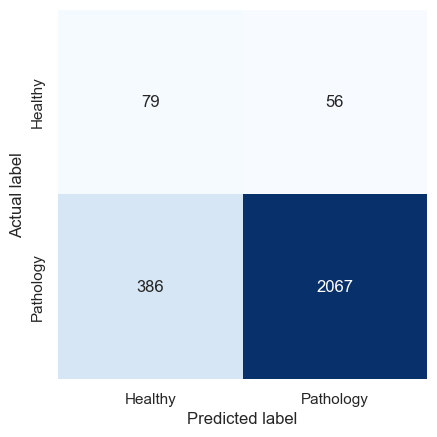

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

y_predicted = model.predict(X_test)

mat = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis=1))

class_labels = ["Healthy", "Pathology"]

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
             xticklabels=class_labels,
             yticklabels=class_labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

plt.savefig('heatmap.png')


In [43]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)

np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)

0.916860044002533


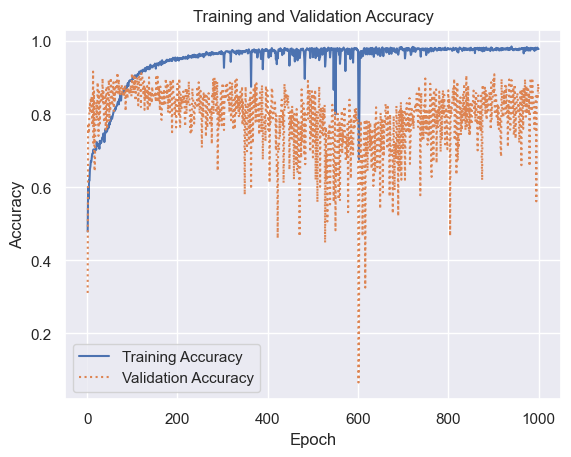

In [44]:
import matplotlib.pyplot as plt

acc = hist.history['categorical_accuracy']
val_acc = hist.history['val_categorical_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

plt.savefig('graph.png')

best_score = max(hist.history['val_categorical_accuracy'])

print(best_score)

In [45]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2%}")

81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 0.8292 - loss: 1.2120
Test accuracy: 82.92%
